In [1]:
# Import Statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
data = pd.read_csv(url, delim_whitespace=True, header=None)
data.columns = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", 
               "Acceleration", "Model_Year", "Origin", "Car_Name"]

In [3]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
data = data.replace(to_replace="?", value=np.nan)
data.apply(lambda x: x.isnull().sum(), axis=0)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
Car_Name        0
dtype: int64

In [5]:
### There are missing horsepower values, I am going to remove.
data.loc[data.Horsepower.isnull(),]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Car_Name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [6]:
data = data.loc[~data.Horsepower.isnull(),]

In [7]:
data.apply(lambda x: x.isnull().sum(), axis=0)

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Origin          0
Car_Name        0
dtype: int64

In [8]:
# Origin is a multivalued categorical column
data.Origin.value_counts()

1    245
3     79
2     68
Name: Origin, dtype: int64

In [9]:
# 1 is American, 2 is European, 3 is Asian

data.loc[:, "American"] = (data.loc[:, "Origin"] == 1).astype(int)
data.loc[:, "European"] = (data.loc[:, "Origin"] == 2).astype(int)
data.loc[:, "Asian"] = (data.loc[:, "Origin"] == 3).astype(int)

pd.DataFrame(data.loc[:,["American", "European", "Asian"]]).sum(axis = 0)
#  This agrees with the above output of value_counts, so I am confident this is correctly done

American    245
European     68
Asian        79
dtype: int64

In [10]:
data = data.drop("Origin", axis = 1)

In [11]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Car_Name,American,European,Asian
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1,0,0


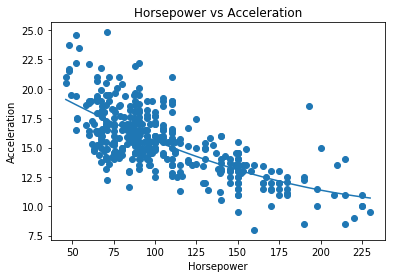

With the following parameters:
           2
0.0001504 x - 0.08707 x + 22.77


In [12]:
colors = ["#BA4343","#4167BA"]
horsepower = data.Horsepower.apply(float)
acceleration = data.Acceleration.apply(float)
fit = np.poly1d(np.polyfit(horsepower, acceleration, 2))
sct = plt.scatter(horsepower, acceleration)
plt.plot(np.unique(horsepower), fit(np.unique(horsepower)))
plt.title("Horsepower vs Acceleration")
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")
plt.show()
print("With the following parameters:")
print(fit)

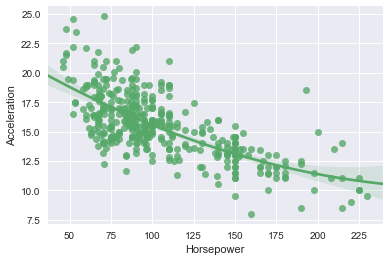

In [13]:
#  This is going to look at the seaborn package
#  It looks generally the same but it has confidence bands, which is neat
sns.set(color_codes = True)
sns.regplot(horsepower,acceleration, color="G", order = 2)

In [16]:
np.mad(horsepower)

AttributeError: module 'numpy' has no attribute 'mad'